In [1]:
import gzip
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
def load_data(path, offset=16):
    with gzip.open(path, 'rb') as f:
        return np.frombuffer(f.read(), dtype=np.uint8, offset=offset)

def preprocess_data():
    print("Loading dataset...")
    train_images = load_data("./dataset/emnist-byclass-train-images-idx3-ubyte.gz").reshape(-1, 28, 28, 1).astype(np.float32)
    train_labels = load_data("./dataset/emnist-byclass-train-labels-idx1-ubyte.gz", offset=8)
    test_images = load_data("./dataset/emnist-byclass-test-images-idx3-ubyte.gz").reshape(-1, 28, 28, 1).astype(np.float32)
    test_labels = load_data("./dataset/emnist-byclass-test-labels-idx1-ubyte.gz", offset=8)
    print("Dataset loaded.")

    mean, std = np.mean(train_images), np.std(train_images)
    train_images, test_images = (train_images - mean) / std, (test_images - mean) / std

    train_labels = to_categorical(train_labels, 62)
    test_labels = to_categorical(test_labels, 62)

    X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.05, random_state=42)
    
    print(f"Training: {X_train.shape}, Validation: {X_val.shape}, Test: {test_images.shape}")
    return X_train, X_val, y_train, y_val, test_images, test_labels

In [3]:
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)), 
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(62, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [4]:
def train_model(model, X_train, y_train, X_val, y_val):
    print("Training model...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=8,
        batch_size=256
    )
    print("Training completed.")
    return history

Loading dataset...
Dataset loaded.
Training: (663035, 28, 28, 1), Validation: (34897, 28, 28, 1), Test: (116323, 28, 28, 1)


C:\Users\bugud\anaconda3\envs\robotics\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 429,246 (1.64 MB)

 Trainable params: 428,798 (1.64 MB)

 Non-trainable params: 448 (1.75 KB)

Training model...
Epoch 1/8
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 318s 121ms/step - accuracy: 0.7758 - loss: 0.7836 - val_accuracy: 0.8578 - val_loss: 0.4056
Epoch 2/8
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 343s 132ms/step - accuracy: 0.8552 - loss: 0.4064 - val_accuracy: 0.8637 - val_loss: 0.3825
Epoch 3/8
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 328s 127ms/step - accuracy: 0.8626 - loss: 0.3771 - val_accuracy: 0.8661 - val_loss: 0.3689
Epoch 4/8
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 346s 134ms/step - accuracy: 0.8677 - loss: 0.3601 - val_accuracy: 0.8669 - val_loss: 0.3643
Epoch 5/8
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 307s 118ms/step - accuracy: 0.8713 - loss: 0.3467 - val_accuracy: 0.8681 - val_loss: 0.3622
Epoch 6/8
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 274s 106ms/step - accuracy: 0.8747 - loss: 0.3343 - val_accuracy: 0.8701 - val_loss: 0.3570
Epoch 7/8
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 269s 104ms/step - accuracy: 0.8766 - loss: 0.3287 - val_accuracy: 0.8700 - val_loss: 0.3546
Epoch 8/8
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 276s 106ms

Training completed.
Model saved.
3636/3636 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.8698 - loss: 0.3517
Test Accuracy: 0.8707
Plotting graph for analysis.


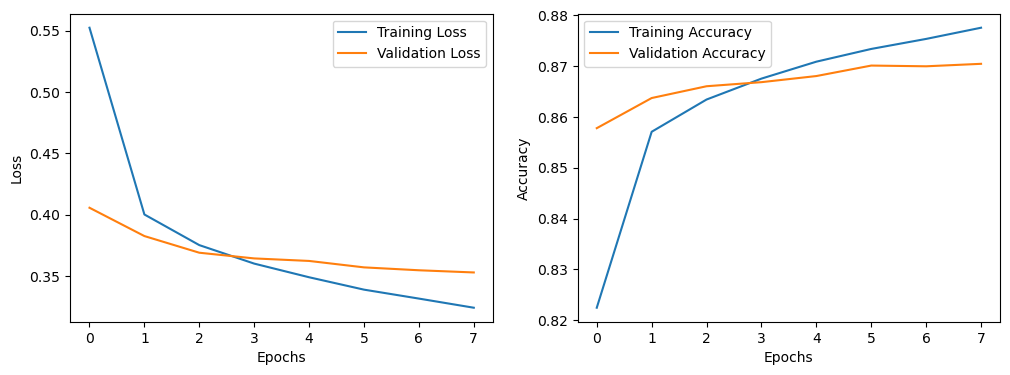

Process completed.


In [5]:
def save_model(model, filename="fast_cnn_model.h5"):
    model.save(filename)
    print("Model saved.")

def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc:.4f}")

def plot_training_history(hist):
    print("Plotting graph for analysis.")
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

def main():
    X_train, X_val, y_train, y_val, test_images, test_labels = preprocess_data()
    model = create_model()
    
    print("Model Summary:")
    model.summary()

    history = train_model(model, X_train, y_train, X_val, y_val)
    
    save_model(model)
    evaluate_model(model, test_images, test_labels)
    plot_training_history(history)
    print("Process completed.")

if __name__ == "__main__":
    main()